# Salary Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

Wczytajmy dane znajdujące się w folderze ./data , plik salary.csv i spojrzmy na ich strukturę

In [2]:
import os

def load_data(filename, FOLDER="./data"):
    csv_path = os.path.join(FOLDER, filename)
    return pd.read_csv(csv_path)

In [3]:
data = load_data("salary.csv")
display(data.head())

data = data[:10000]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Columns are:
 - age: continuous.
 - workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
 - fnlwgt: continuous.
 - education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th,    10th, Doctorate, 5th-6th, Preschool.
 - education-num: continuous.
 - marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
 - occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op- inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
 - relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
 - race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
 - sex: Female, Male.
 - capital-gain: continuous.
 - capital-loss: continuous.
 - hours-per-week: continuous.
 - native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
 - salary: <=50K or >50K

Just to make some not obvious things clear:

- The continuous variable fnlwgt represents final weight, which is the number of units in the target population that the responding unit represents.
- education-num - number of years of education

In [4]:
data[data.columns] = data[data.columns].replace(" ?", np.nan)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             10000 non-null  int64 
 1   workclass       9415 non-null   object
 2   fnlwgt          10000 non-null  int64 
 3   education       10000 non-null  object
 4   education-num   10000 non-null  int64 
 5   marital-status  10000 non-null  object
 6   occupation      9414 non-null   object
 7   relationship    10000 non-null  object
 8   race            10000 non-null  object
 9   sex             10000 non-null  object
 10  capital-gain    10000 non-null  int64 
 11  capital-loss    10000 non-null  int64 
 12  hours-per-week  10000 non-null  int64 
 13  native-country  9819 non-null   object
 14  salary          10000 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.1+ MB


Widzimy, że w ałym datasecie mamy 32561 wiersze.

W kolumnie workclass mamy 1836 wartości null (5.6%) 

W kolumnie occupation mamy 1843 wartości null (5.7%)

W kolumnie native-country mamy 583 wartości null (1.8%)

In [6]:
data.isna().sum()

age                 0
workclass         585
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        586
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    181
salary              0
dtype: int64

Widzimy, że mamy stosunkowo mało wierszy z nullową kollumną native-country. \
Najlepszym i najprostszym podejściem w takiej sytuacji wydaje się być po prostu usunięcie tych rekordów.

In [7]:
data=data[data['native-country'].notna()]

In [8]:
print(data.isna().sum())
print(data.info())

age                 0
workclass         574
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        575
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country      0
salary              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9819 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             9819 non-null   int64 
 1   workclass       9245 non-null   object
 2   fnlwgt          9819 non-null   int64 
 3   education       9819 non-null   object
 4   education-num   9819 non-null   int64 
 5   marital-status  9819 non-null   object
 6   occupation      9244 non-null   object
 7   relationship    9819 non-null   object
 8   race            9819 non-null   object
 9   sex             9819 non-null   object
 10  capital-gain    9

In [9]:
data["occupation"].value_counts()

 Prof-specialty       1219
 Exec-managerial      1197
 Craft-repair         1187
 Adm-clerical         1172
 Sales                1159
 Other-service        1005
 Machine-op-inspct     610
 Transport-moving      500
 Handlers-cleaners     389
 Farming-fishing       289
 Tech-support          280
 Protective-serv       195
 Priv-house-serv        40
 Armed-Forces            2
Name: occupation, dtype: int64

Wartości nullowe w kolumnie occupation wypełnimy wartością domyślną Other-service, a dla wartości nullowych kolumny workclass wprowadzimy nową wartość Other. 

In [10]:
data["occupation"].fillna(value=" Other-service", inplace=True)
data["workclass"].fillna(value=" Other", inplace=True)

print(data["occupation"].value_counts())
print(data["workclass"].value_counts())


 Other-service        1580
 Prof-specialty       1219
 Exec-managerial      1197
 Craft-repair         1187
 Adm-clerical         1172
 Sales                1159
 Machine-op-inspct     610
 Transport-moving      500
 Handlers-cleaners     389
 Farming-fishing       289
 Tech-support          280
 Protective-serv       195
 Priv-house-serv        40
 Armed-Forces            2
Name: occupation, dtype: int64
 Private             6821
 Self-emp-not-inc     793
 Local-gov            638
 Other                574
 State-gov            394
 Self-emp-inc         332
 Federal-gov          264
 Without-pay            2
 Never-worked           1
Name: workclass, dtype: int64


### Zamienimy kluczy na binarne wartości

In [11]:
data = data.replace([">50K", "<=50K"], [0, 1], regex = True)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1


### Zrobimy to samo dla innej binarnej kolumny ''sex" 

In [12]:
data = data.replace(["Female", "Male"], [0, 1], regex = True)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,1


Podzielimy dane na kolumny kategoryczne, numeryczne i binarne

Kolumny numeryczne : age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week \
Kolumny kategoryczne : workclass, education, marital-status, occupation, relationship, race, native-country \
Kolumny binarne : sex, salary

In [13]:
numerical_fields = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
categorical_fields = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "native-country"]
binary_fields = ["sex", "salary"]

## Przyjżyjmy się dokładniej danym numerycznym

In [14]:
data.describe()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,salary
count,9819.000000,9.819000e+03,9819.000000,9819.000000,9819.000000,9819.000000,9819.000000,9819.000000
mean,38.441185,1.907656e+05,10.067930,0.669009,1050.364497,86.617782,40.517670,0.763214
std,13.623277,1.066171e+05,2.535342,0.470594,7255.633708,397.912735,12.274902,0.425131
min,17.000000,1.930200e+04,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,27.000000,1.179730e+05,9.000000,0.000000,0.000000,0.000000,40.000000,1.000000
50%,37.000000,1.792030e+05,10.000000,1.000000,0.000000,0.000000,40.000000,1.000000
75%,47.000000,2.399515e+05,12.000000,1.000000,0.000000,0.000000,45.000000,1.000000
max,90.000000,1.226583e+06,16.000000,1.000000,99999.000000,4356.000000,99.000000,1.000000


Najprawdopodobniej będziemy ignorować kolumny capital-gain i kapital-loss z powodu tego, że prawie zawsze mają wartośc 0

In [15]:
print(data["capital-loss"].value_counts())

0       9360
1902      66
1977      56
1887      36
1485      19
        ... 
2547       1
419        1
1651       1
653        1
4356       1
Name: capital-loss, Length: 71, dtype: int64


In [16]:
print(data["capital-gain"].value_counts())

0        9013
15024     111
7688       83
7298       64
99999      46
         ... 
1111        1
1086        1
4931        1
991         1
25124       1
Name: capital-gain, Length: 102, dtype: int64


### Przyjrzyjmy się pozostałym kolumnam numerycznym

In [17]:
print(data["fnlwgt"].value_counts())

121124    6
123983    6
177675    5
168071    5
116632    5
         ..
117674    1
197023    1
134671    1
243607    1
126743    1
Name: fnlwgt, Length: 8397, dtype: int64


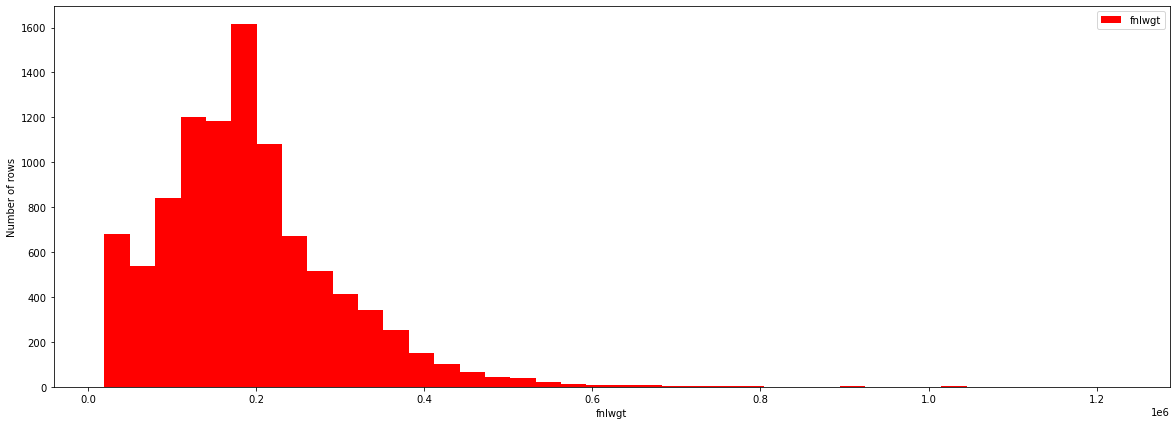

In [18]:
fig = plt.figure(figsize=(20,7))
plt.hist(data['fnlwgt'], bins=40, color="red", label='fnlwgt')
plt.xlabel('fnlwgt')
plt.ylabel('Number of rows')
plt.legend()
plt.show()

#### popatrzmy jak jest rozpodzielony wiek w naszy datasecie

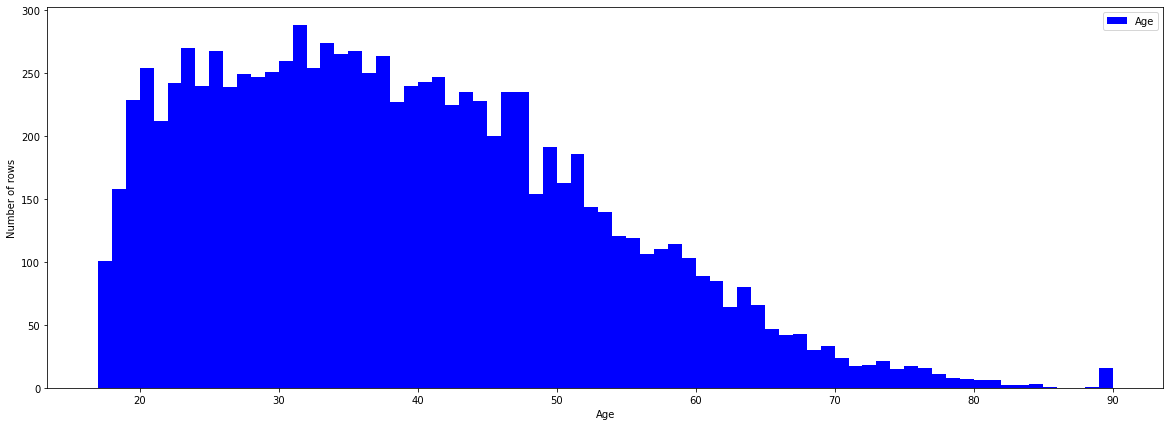

In [19]:
fig = plt.figure(figsize=(20,7))
plt.hist(data['age'], bins=73, color="blue", label='Age')
plt.xlabel('Age')
plt.ylabel('Number of rows')
plt.legend()
plt.show()

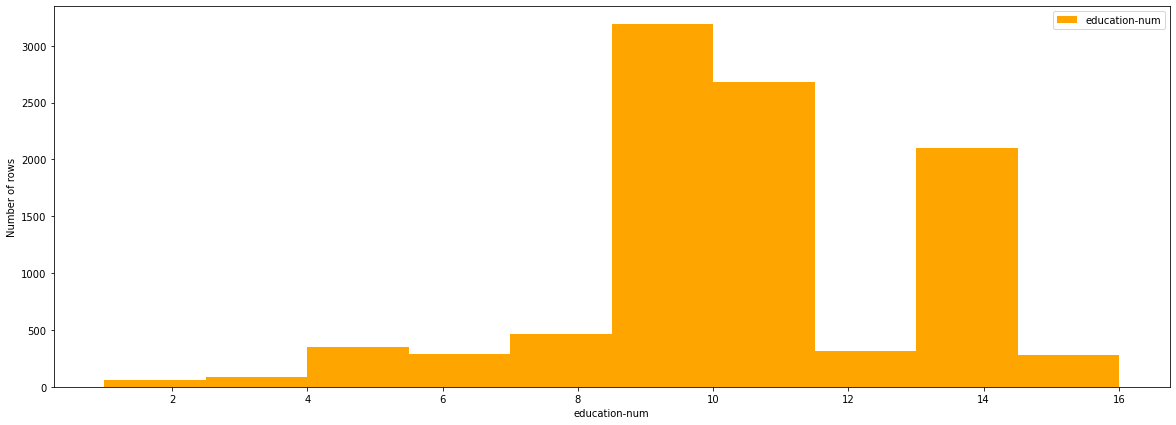

In [20]:
fig = plt.figure(figsize=(20,7))
plt.hist(data['education-num'], bins=10, color="orange", label='education-num')
plt.xlabel('education-num')
plt.ylabel('Number of rows')
plt.legend()
plt.show()

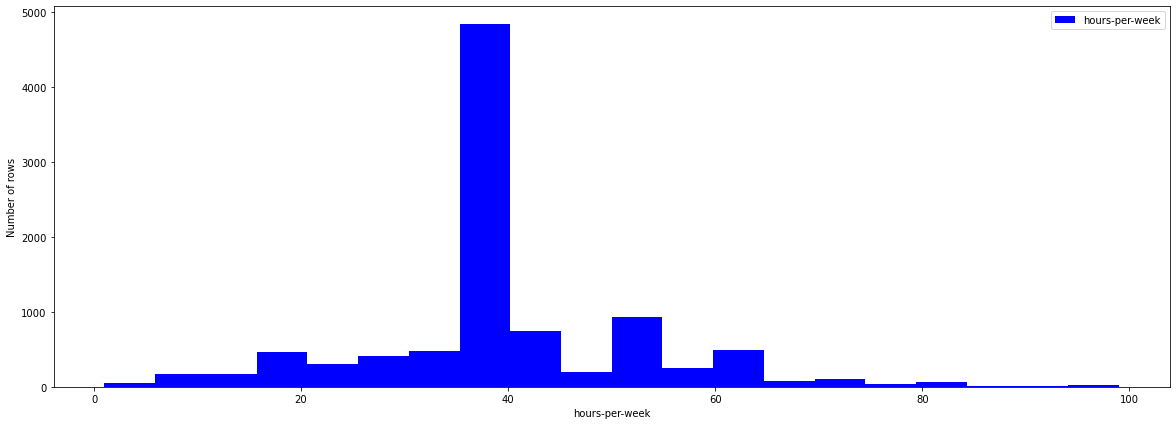

In [21]:
fig = plt.figure(figsize=(20,7))
plt.hist(data['hours-per-week'], bins=20, color="blue", label='hours-per-week')
plt.xlabel('hours-per-week')
plt.ylabel('Number of rows')
plt.legend()
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='salary', ylabel='count'>

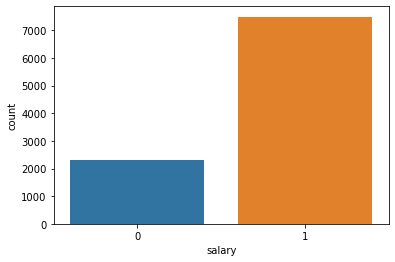

In [22]:
import seaborn as sns 
sns.countplot(data["salary"])

Widzimy, że klasa negatywna i pozytywna są przedstawione w datasecie w różnych proporscjach, więc musimy pamiętać, aby koniecznie używać StratifiedKFold().

### Znormalizujemy numeryczne kolumny

In [23]:
def normalize_field(dataset, field_name):
    dataset[field_name] = dataset[field_name] / dataset[field_name].max()
    return dataset

In [24]:
for field in numerical_fields:
    data = normalize_field(data, field)

In [25]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,0.433333,State-gov,0.063197,Bachelors,0.8125,Never-married,Adm-clerical,Not-in-family,White,1,0.02174,0.0,0.404040,United-States,1
1,0.555556,Self-emp-not-inc,0.067921,Bachelors,0.8125,Married-civ-spouse,Exec-managerial,Husband,White,1,0.00000,0.0,0.131313,United-States,1
2,0.422222,Private,0.175810,HS-grad,0.5625,Divorced,Handlers-cleaners,Not-in-family,White,1,0.00000,0.0,0.404040,United-States,1
3,0.588889,Private,0.191362,11th,0.4375,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0.00000,0.0,0.404040,United-States,1
4,0.311111,Private,0.275896,Bachelors,0.8125,Married-civ-spouse,Prof-specialty,Wife,Black,0,0.00000,0.0,0.404040,Cuba,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.422222,Private,0.065469,Some-college,0.6250,Married-civ-spouse,Sales,Husband,White,1,0.00000,0.0,0.606061,United-States,0
9996,0.277778,Private,0.342136,HS-grad,0.5625,Never-married,Other-service,Own-child,White,0,0.00000,0.0,0.080808,United-States,1
9997,0.233333,Private,0.260205,Some-college,0.6250,Never-married,Transport-moving,Own-child,Black,1,0.00000,0.0,0.404040,United-States,1
9998,0.411111,Private,0.103330,1st-4th,0.1250,Married-civ-spouse,Other-service,Husband,White,1,0.00000,0.0,0.535354,Mexico,1


Resztę pozostawiamy bez zmian 

## Przyjrzyjmy się kolumnam kategorycznym

In [26]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [27]:
print(data["workclass"].value_counts())
# le.fit(data["workclass"])
# data["workclass"] = le.transform(data["workclass"])

 Private             6821
 Self-emp-not-inc     793
 Local-gov            638
 Other                574
 State-gov            394
 Self-emp-inc         332
 Federal-gov          264
 Without-pay            2
 Never-worked           1
Name: workclass, dtype: int64


In [28]:
print(data["education"].value_counts())
# le.fit(data["education"])
# data["education"] = le.transform(data["education"])

 HS-grad         3187
 Some-college    2272
 Bachelors       1585
 Masters          519
 Assoc-voc        412
 11th             361
 Assoc-acdm       314
 10th             290
 7th-8th          200
 Prof-school      171
 9th              151
 Doctorate        106
 12th             105
 5th-6th           84
 1st-4th           46
 Preschool         16
Name: education, dtype: int64


In [29]:
print(data["marital-status"].value_counts())
# le.fit(data["marital-status"])
# data["marital-status"] = le.transform(data["marital-status"])

 Married-civ-spouse       4461
 Never-married            3252
 Divorced                 1373
 Separated                 314
 Widowed                   290
 Married-spouse-absent     122
 Married-AF-spouse           7
Name: marital-status, dtype: int64


In [30]:
print(data["occupation"].value_counts())
# le.fit(data["occupation"])
# data["occupation"] = le.transform(data["occupation"])

 Other-service        1580
 Prof-specialty       1219
 Exec-managerial      1197
 Craft-repair         1187
 Adm-clerical         1172
 Sales                1159
 Machine-op-inspct     610
 Transport-moving      500
 Handlers-cleaners     389
 Farming-fishing       289
 Tech-support          280
 Protective-serv       195
 Priv-house-serv        40
 Armed-Forces            2
Name: occupation, dtype: int64


In [31]:
print(data["relationship"].value_counts())
# le.fit(data["relationship"])
# data["relationship"] = le.transform(data["relationship"])

 Husband           3919
 Not-in-family     2543
 Own-child         1547
 Unmarried         1036
 Wife               484
 Other-relative     290
Name: relationship, dtype: int64


In [32]:
print(data["race"].value_counts())
# le.fit(data["race"])
# data["race"] = le.transform(data["race"])

 White                 8428
 Black                  929
 Asian-Pac-Islander     286
 Amer-Indian-Eskimo      99
 Other                   77
Name: race, dtype: int64


In [33]:
print(data["native-country"].value_counts())
# le.fit(data["native-country"])
# data["native-country"] = le.transform(data["native-country"])

 United-States                 8930
 Mexico                         208
 Philippines                     51
 Canada                          47
 Germany                         45
 Puerto-Rico                     35
 Cuba                            31
 Jamaica                         31
 China                           30
 El-Salvador                     30
 England                         29
 South                           27
 India                           26
 Vietnam                         23
 Dominican-Republic              23
 Iran                            22
 Poland                          22
 Guatemala                       21
 Japan                           20
 Italy                           19
 Taiwan                          18
 Greece                          17
 Haiti                           15
 Portugal                        12
 Nicaragua                       10
 Columbia                        10
 Cambodia                         7
 Peru                       

Będziemy brać pod uwagę wszystkie kolumny kategoryczne. 

In [34]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,0.433333,State-gov,0.063197,Bachelors,0.8125,Never-married,Adm-clerical,Not-in-family,White,1,0.02174,0.0,0.404040,United-States,1
1,0.555556,Self-emp-not-inc,0.067921,Bachelors,0.8125,Married-civ-spouse,Exec-managerial,Husband,White,1,0.00000,0.0,0.131313,United-States,1
2,0.422222,Private,0.175810,HS-grad,0.5625,Divorced,Handlers-cleaners,Not-in-family,White,1,0.00000,0.0,0.404040,United-States,1
3,0.588889,Private,0.191362,11th,0.4375,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0.00000,0.0,0.404040,United-States,1
4,0.311111,Private,0.275896,Bachelors,0.8125,Married-civ-spouse,Prof-specialty,Wife,Black,0,0.00000,0.0,0.404040,Cuba,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.422222,Private,0.065469,Some-college,0.6250,Married-civ-spouse,Sales,Husband,White,1,0.00000,0.0,0.606061,United-States,0
9996,0.277778,Private,0.342136,HS-grad,0.5625,Never-married,Other-service,Own-child,White,0,0.00000,0.0,0.080808,United-States,1
9997,0.233333,Private,0.260205,Some-college,0.6250,Never-married,Transport-moving,Own-child,Black,1,0.00000,0.0,0.404040,United-States,1
9998,0.411111,Private,0.103330,1st-4th,0.1250,Married-civ-spouse,Other-service,Husband,White,1,0.00000,0.0,0.535354,Mexico,1


### Stworzymy DataFrame Selector

In [35]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

Zbudujmy pipeline dla atrybutów numerycznych

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

numerical_fields = ["age", "fnlwgt", "education-num", "hours-per-week"]

num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(numerical_fields)),
        ("imputer", SimpleImputer(strategy="median")),
    ])

Imputer dla kategorycznych kolumn

In [37]:
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

Zbudujmy pipeline dla atrybutów kategorycznych

In [38]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

catbin = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "native-country", "sex"]

cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(catbin)),
        ("imputer", MostFrequentImputer()),
        ("cat_encoder", OneHotEncoder(sparse=False, handle_unknown = 'ignore')),
    ])

In [39]:
from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

## Podzielimy zbiór danych na X i y

In [43]:
X = data.drop(['salary'], axis=1)
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.433333,State-gov,0.063197,Bachelors,0.8125,Never-married,Adm-clerical,Not-in-family,White,1,0.02174,0.0,0.404040,United-States
1,0.555556,Self-emp-not-inc,0.067921,Bachelors,0.8125,Married-civ-spouse,Exec-managerial,Husband,White,1,0.00000,0.0,0.131313,United-States
2,0.422222,Private,0.175810,HS-grad,0.5625,Divorced,Handlers-cleaners,Not-in-family,White,1,0.00000,0.0,0.404040,United-States
3,0.588889,Private,0.191362,11th,0.4375,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0.00000,0.0,0.404040,United-States
4,0.311111,Private,0.275896,Bachelors,0.8125,Married-civ-spouse,Prof-specialty,Wife,Black,0,0.00000,0.0,0.404040,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.422222,Private,0.065469,Some-college,0.6250,Married-civ-spouse,Sales,Husband,White,1,0.00000,0.0,0.606061,United-States
9996,0.277778,Private,0.342136,HS-grad,0.5625,Never-married,Other-service,Own-child,White,0,0.00000,0.0,0.080808,United-States
9997,0.233333,Private,0.260205,Some-college,0.6250,Never-married,Transport-moving,Own-child,Black,1,0.00000,0.0,0.404040,United-States
9998,0.411111,Private,0.103330,1st-4th,0.1250,Married-civ-spouse,Other-service,Husband,White,1,0.00000,0.0,0.535354,Mexico


In [44]:
y = data['salary'].values
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

## Podzielimy zbiór danych na train i test

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)

In [46]:
num_pipeline.fit_transform(X_train)

array([[0.33333333, 0.17270743, 0.625     , 0.16161616],
       [0.61111111, 0.26602113, 0.5625    , 0.25252525],
       [0.28888889, 0.14355082, 0.625     , 0.4040404 ],
       ...,
       [0.28888889, 0.7477847 , 0.5       , 0.4040404 ],
       [0.67777778, 0.18797586, 0.8125    , 0.4040404 ],
       [0.52222222, 0.04506177, 0.625     , 0.4040404 ]])

In [47]:
cat_pipeline.fit_transform(X_train)

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

# Płytkie uczenie

In [57]:
from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=5)

In [58]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', RandomForestClassifier())])

param_grid = { 
    'classifier__n_estimators': [200, 500],
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__max_depth': [4,5,6,7,8],
    'classifier__criterion': ['gini', 'entropy']
}

forest = GridSearchCV(pipe, param_grid, cv=kfold, verbose=10)
forest.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5; 1/60] START classifier__criterion=gini, classifier__max_depth=4, classifier__max_features=auto, classifier__n_estimators=200
[CV 1/5; 1/60] END classifier__criterion=gini, classifier__max_depth=4, classifier__max_features=auto, classifier__n_estimators=200;, score=0.815 total time=   0.5s
[CV 2/5; 1/60] START classifier__criterion=gini, classifier__max_depth=4, classifier__max_features=auto, classifier__n_estimators=200
[CV 2/5; 1/60] END classifier__criterion=gini, classifier__max_depth=4, classifier__max_features=auto, classifier__n_estimators=200;, score=0.809 total time=   0.5s
[CV 3/5; 1/60] START classifier__criterion=gini, classifier__max_depth=4, classifier__max_features=auto, classifier__n_estimators=200
[CV 3/5; 1/60] END classifier__criterion=gini, classifier__max_depth=4, classifier__max_features=auto, classifier__n_estimators=200;, score=0.812 total time=   0.5s
[CV 4/5; 1/60] START classifier__criterio

[CV 3/5; 6/60] END classifier__criterion=gini, classifier__max_depth=4, classifier__max_features=log2, classifier__n_estimators=500;, score=0.782 total time=   1.5s
[CV 4/5; 6/60] START classifier__criterion=gini, classifier__max_depth=4, classifier__max_features=log2, classifier__n_estimators=500
[CV 4/5; 6/60] END classifier__criterion=gini, classifier__max_depth=4, classifier__max_features=log2, classifier__n_estimators=500;, score=0.787 total time=   1.8s
[CV 5/5; 6/60] START classifier__criterion=gini, classifier__max_depth=4, classifier__max_features=log2, classifier__n_estimators=500
[CV 5/5; 6/60] END classifier__criterion=gini, classifier__max_depth=4, classifier__max_features=log2, classifier__n_estimators=500;, score=0.778 total time=   2.5s
[CV 1/5; 7/60] START classifier__criterion=gini, classifier__max_depth=5, classifier__max_features=auto, classifier__n_estimators=200
[CV 1/5; 7/60] END classifier__criterion=gini, classifier__max_depth=5, classifier__max_features=auto, 

[CV 1/5; 12/60] END classifier__criterion=gini, classifier__max_depth=5, classifier__max_features=log2, classifier__n_estimators=500;, score=0.805 total time=   2.2s
[CV 2/5; 12/60] START classifier__criterion=gini, classifier__max_depth=5, classifier__max_features=log2, classifier__n_estimators=500
[CV 2/5; 12/60] END classifier__criterion=gini, classifier__max_depth=5, classifier__max_features=log2, classifier__n_estimators=500;, score=0.797 total time=   1.3s
[CV 3/5; 12/60] START classifier__criterion=gini, classifier__max_depth=5, classifier__max_features=log2, classifier__n_estimators=500
[CV 3/5; 12/60] END classifier__criterion=gini, classifier__max_depth=5, classifier__max_features=log2, classifier__n_estimators=500;, score=0.815 total time=   2.6s
[CV 4/5; 12/60] START classifier__criterion=gini, classifier__max_depth=5, classifier__max_features=log2, classifier__n_estimators=500
[CV 4/5; 12/60] END classifier__criterion=gini, classifier__max_depth=5, classifier__max_features

[CV 4/5; 17/60] END classifier__criterion=gini, classifier__max_depth=6, classifier__max_features=log2, classifier__n_estimators=200;, score=0.812 total time=   0.6s
[CV 5/5; 17/60] START classifier__criterion=gini, classifier__max_depth=6, classifier__max_features=log2, classifier__n_estimators=200
[CV 5/5; 17/60] END classifier__criterion=gini, classifier__max_depth=6, classifier__max_features=log2, classifier__n_estimators=200;, score=0.814 total time=   1.2s
[CV 1/5; 18/60] START classifier__criterion=gini, classifier__max_depth=6, classifier__max_features=log2, classifier__n_estimators=500
[CV 1/5; 18/60] END classifier__criterion=gini, classifier__max_depth=6, classifier__max_features=log2, classifier__n_estimators=500;, score=0.817 total time=   2.4s
[CV 2/5; 18/60] START classifier__criterion=gini, classifier__max_depth=6, classifier__max_features=log2, classifier__n_estimators=500
[CV 2/5; 18/60] END classifier__criterion=gini, classifier__max_depth=6, classifier__max_features

[CV 2/5; 23/60] END classifier__criterion=gini, classifier__max_depth=7, classifier__max_features=log2, classifier__n_estimators=200;, score=0.817 total time=   1.1s
[CV 3/5; 23/60] START classifier__criterion=gini, classifier__max_depth=7, classifier__max_features=log2, classifier__n_estimators=200
[CV 3/5; 23/60] END classifier__criterion=gini, classifier__max_depth=7, classifier__max_features=log2, classifier__n_estimators=200;, score=0.820 total time=   0.6s
[CV 4/5; 23/60] START classifier__criterion=gini, classifier__max_depth=7, classifier__max_features=log2, classifier__n_estimators=200
[CV 4/5; 23/60] END classifier__criterion=gini, classifier__max_depth=7, classifier__max_features=log2, classifier__n_estimators=200;, score=0.819 total time=   0.6s
[CV 5/5; 23/60] START classifier__criterion=gini, classifier__max_depth=7, classifier__max_features=log2, classifier__n_estimators=200
[CV 5/5; 23/60] END classifier__criterion=gini, classifier__max_depth=7, classifier__max_features

[CV 5/5; 28/60] END classifier__criterion=gini, classifier__max_depth=8, classifier__max_features=sqrt, classifier__n_estimators=500;, score=0.828 total time=   3.6s
[CV 1/5; 29/60] START classifier__criterion=gini, classifier__max_depth=8, classifier__max_features=log2, classifier__n_estimators=200
[CV 1/5; 29/60] END classifier__criterion=gini, classifier__max_depth=8, classifier__max_features=log2, classifier__n_estimators=200;, score=0.822 total time=   0.6s
[CV 2/5; 29/60] START classifier__criterion=gini, classifier__max_depth=8, classifier__max_features=log2, classifier__n_estimators=200
[CV 2/5; 29/60] END classifier__criterion=gini, classifier__max_depth=8, classifier__max_features=log2, classifier__n_estimators=200;, score=0.823 total time=   0.7s
[CV 3/5; 29/60] START classifier__criterion=gini, classifier__max_depth=8, classifier__max_features=log2, classifier__n_estimators=200
[CV 3/5; 29/60] END classifier__criterion=gini, classifier__max_depth=8, classifier__max_features

[CV 2/5; 34/60] END classifier__criterion=entropy, classifier__max_depth=4, classifier__max_features=sqrt, classifier__n_estimators=500;, score=0.807 total time=   1.6s
[CV 3/5; 34/60] START classifier__criterion=entropy, classifier__max_depth=4, classifier__max_features=sqrt, classifier__n_estimators=500
[CV 3/5; 34/60] END classifier__criterion=entropy, classifier__max_depth=4, classifier__max_features=sqrt, classifier__n_estimators=500;, score=0.814 total time=   3.0s
[CV 4/5; 34/60] START classifier__criterion=entropy, classifier__max_depth=4, classifier__max_features=sqrt, classifier__n_estimators=500
[CV 4/5; 34/60] END classifier__criterion=entropy, classifier__max_depth=4, classifier__max_features=sqrt, classifier__n_estimators=500;, score=0.810 total time=   2.1s
[CV 5/5; 34/60] START classifier__criterion=entropy, classifier__max_depth=4, classifier__max_features=sqrt, classifier__n_estimators=500
[CV 5/5; 34/60] END classifier__criterion=entropy, classifier__max_depth=4, cla

[CV 4/5; 39/60] END classifier__criterion=entropy, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=200;, score=0.818 total time=   1.8s
[CV 5/5; 39/60] START classifier__criterion=entropy, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=200
[CV 5/5; 39/60] END classifier__criterion=entropy, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=200;, score=0.822 total time=   1.9s
[CV 1/5; 40/60] START classifier__criterion=entropy, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=500
[CV 1/5; 40/60] END classifier__criterion=entropy, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=500;, score=0.824 total time=   2.8s
[CV 2/5; 40/60] START classifier__criterion=entropy, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=500
[CV 2/5; 40/60] END classifier__criterion=entropy, classifier__max_depth=5, cla

[CV 1/5; 45/60] END classifier__criterion=entropy, classifier__max_depth=6, classifier__max_features=sqrt, classifier__n_estimators=200;, score=0.825 total time=   0.7s
[CV 2/5; 45/60] START classifier__criterion=entropy, classifier__max_depth=6, classifier__max_features=sqrt, classifier__n_estimators=200
[CV 2/5; 45/60] END classifier__criterion=entropy, classifier__max_depth=6, classifier__max_features=sqrt, classifier__n_estimators=200;, score=0.825 total time=   1.3s
[CV 3/5; 45/60] START classifier__criterion=entropy, classifier__max_depth=6, classifier__max_features=sqrt, classifier__n_estimators=200
[CV 3/5; 45/60] END classifier__criterion=entropy, classifier__max_depth=6, classifier__max_features=sqrt, classifier__n_estimators=200;, score=0.814 total time=   1.7s
[CV 4/5; 45/60] START classifier__criterion=entropy, classifier__max_depth=6, classifier__max_features=sqrt, classifier__n_estimators=200
[CV 4/5; 45/60] END classifier__criterion=entropy, classifier__max_depth=6, cla

[CV 3/5; 50/60] END classifier__criterion=entropy, classifier__max_depth=7, classifier__max_features=auto, classifier__n_estimators=500;, score=0.819 total time=   4.3s
[CV 4/5; 50/60] START classifier__criterion=entropy, classifier__max_depth=7, classifier__max_features=auto, classifier__n_estimators=500
[CV 4/5; 50/60] END classifier__criterion=entropy, classifier__max_depth=7, classifier__max_features=auto, classifier__n_estimators=500;, score=0.822 total time=   3.4s
[CV 5/5; 50/60] START classifier__criterion=entropy, classifier__max_depth=7, classifier__max_features=auto, classifier__n_estimators=500
[CV 5/5; 50/60] END classifier__criterion=entropy, classifier__max_depth=7, classifier__max_features=auto, classifier__n_estimators=500;, score=0.822 total time=   5.6s
[CV 1/5; 51/60] START classifier__criterion=entropy, classifier__max_depth=7, classifier__max_features=sqrt, classifier__n_estimators=200
[CV 1/5; 51/60] END classifier__criterion=entropy, classifier__max_depth=7, cla

[CV 5/5; 55/60] END classifier__criterion=entropy, classifier__max_depth=8, classifier__max_features=auto, classifier__n_estimators=200;, score=0.828 total time=   0.8s
[CV 1/5; 56/60] START classifier__criterion=entropy, classifier__max_depth=8, classifier__max_features=auto, classifier__n_estimators=500
[CV 1/5; 56/60] END classifier__criterion=entropy, classifier__max_depth=8, classifier__max_features=auto, classifier__n_estimators=500;, score=0.824 total time=   3.4s
[CV 2/5; 56/60] START classifier__criterion=entropy, classifier__max_depth=8, classifier__max_features=auto, classifier__n_estimators=500
[CV 2/5; 56/60] END classifier__criterion=entropy, classifier__max_depth=8, classifier__max_features=auto, classifier__n_estimators=500;, score=0.834 total time=   2.6s
[CV 3/5; 56/60] START classifier__criterion=entropy, classifier__max_depth=8, classifier__max_features=auto, classifier__n_estimators=500
[CV 3/5; 56/60] END classifier__criterion=entropy, classifier__max_depth=8, cla

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessing',
                                        FeatureUnion(transformer_list=[('num_pipeline',
                                                                        Pipeline(steps=[('select_numeric',
                                                                                         DataFrameSelector(attribute_names=['age',
                                                                                                                            'fnlwgt',
                                                                                                                            'education-num',
                                                                                                                            'hours-per-week'])),
                                                                                        ('imputer',
                  

In [50]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', SVC(kernel='rbf'))])

param_grid = {
            'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}
svc_rbf = GridSearchCV(pipe, param_grid, cv=kfold, verbose=10)
svc_rbf.fit(X_train, y_train)
svc_rbf.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5; 1/36] START classifier__C=0.001, classifier__gamma=0.001...............
[CV 1/5; 1/36] END classifier__C=0.001, classifier__gamma=0.001;, score=0.757 total time=   0.5s
[CV 2/5; 1/36] START classifier__C=0.001, classifier__gamma=0.001...............
[CV 2/5; 1/36] END classifier__C=0.001, classifier__gamma=0.001;, score=0.757 total time=   0.5s
[CV 3/5; 1/36] START classifier__C=0.001, classifier__gamma=0.001...............
[CV 3/5; 1/36] END classifier__C=0.001, classifier__gamma=0.001;, score=0.758 total time=   0.5s
[CV 4/5; 1/36] START classifier__C=0.001, classifier__gamma=0.001...............
[CV 4/5; 1/36] END classifier__C=0.001, classifier__gamma=0.001;, score=0.758 total time=   0.5s
[CV 5/5; 1/36] START classifier__C=0.001, classifier__gamma=0.001...............
[CV 5/5; 1/36] END classifier__C=0.001, classifier__gamma=0.001;, score=0.758 total time=   0.7s
[CV 1/5; 2/36] START classifier__C=0.001, classi

[CV 2/5; 10/36] END classifier__C=0.01, classifier__gamma=1;, score=0.757 total time=   2.6s
[CV 3/5; 10/36] START classifier__C=0.01, classifier__gamma=1...................
[CV 3/5; 10/36] END classifier__C=0.01, classifier__gamma=1;, score=0.758 total time=   1.1s
[CV 4/5; 10/36] START classifier__C=0.01, classifier__gamma=1...................
[CV 4/5; 10/36] END classifier__C=0.01, classifier__gamma=1;, score=0.758 total time=   1.1s
[CV 5/5; 10/36] START classifier__C=0.01, classifier__gamma=1...................
[CV 5/5; 10/36] END classifier__C=0.01, classifier__gamma=1;, score=0.758 total time=   2.4s
[CV 1/5; 11/36] START classifier__C=0.01, classifier__gamma=10..................
[CV 1/5; 11/36] END classifier__C=0.01, classifier__gamma=10;, score=0.757 total time=   1.6s
[CV 2/5; 11/36] START classifier__C=0.01, classifier__gamma=10..................
[CV 2/5; 11/36] END classifier__C=0.01, classifier__gamma=10;, score=0.757 total time=   1.1s
[CV 3/5; 11/36] START classifier__C

[CV 4/5; 19/36] END classifier__C=1, classifier__gamma=0.001;, score=0.758 total time=   1.3s
[CV 5/5; 19/36] START classifier__C=1, classifier__gamma=0.001..................
[CV 5/5; 19/36] END classifier__C=1, classifier__gamma=0.001;, score=0.761 total time=   2.5s
[CV 1/5; 20/36] START classifier__C=1, classifier__gamma=0.01...................
[CV 1/5; 20/36] END classifier__C=1, classifier__gamma=0.01;, score=0.760 total time=   1.3s
[CV 2/5; 20/36] START classifier__C=1, classifier__gamma=0.01...................
[CV 2/5; 20/36] END classifier__C=1, classifier__gamma=0.01;, score=0.761 total time=   1.1s
[CV 3/5; 20/36] START classifier__C=1, classifier__gamma=0.01...................
[CV 3/5; 20/36] END classifier__C=1, classifier__gamma=0.01;, score=0.762 total time=   2.3s
[CV 4/5; 20/36] START classifier__C=1, classifier__gamma=0.01...................
[CV 4/5; 20/36] END classifier__C=1, classifier__gamma=0.01;, score=0.759 total time=   1.7s
[CV 5/5; 20/36] START classifier__C

[CV 2/5; 29/36] END classifier__C=10, classifier__gamma=10;, score=0.757 total time=   1.1s
[CV 3/5; 29/36] START classifier__C=10, classifier__gamma=10....................
[CV 3/5; 29/36] END classifier__C=10, classifier__gamma=10;, score=0.758 total time=   1.5s
[CV 4/5; 29/36] START classifier__C=10, classifier__gamma=10....................
[CV 4/5; 29/36] END classifier__C=10, classifier__gamma=10;, score=0.758 total time=   2.7s
[CV 5/5; 29/36] START classifier__C=10, classifier__gamma=10....................
[CV 5/5; 29/36] END classifier__C=10, classifier__gamma=10;, score=0.758 total time=   1.2s
[CV 1/5; 30/36] START classifier__C=10, classifier__gamma=100...................
[CV 1/5; 30/36] END classifier__C=10, classifier__gamma=100;, score=0.757 total time=   1.4s
[CV 2/5; 30/36] START classifier__C=10, classifier__gamma=100...................
[CV 2/5; 30/36] END classifier__C=10, classifier__gamma=100;, score=0.757 total time=   2.6s
[CV 3/5; 30/36] START classifier__C=10, c

{'classifier__C': 10, 'classifier__gamma': 0.01}

In [ ]:
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', SVC(kernel='linear'))])

param_grid = {
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}
svc_linear = GridSearchCV(pipe, param_grid, cv=kfold, verbose=10)
svc_linear.fit(X_train, y_train)
svc_linear.best_params_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START classifier__C=0.001.........................................
[CV 1/5; 1/6] END ..........classifier__C=0.001;, score=0.754 total time= 3.7min
[CV 2/5; 1/6] START classifier__C=0.001.........................................
[CV 2/5; 1/6] END ..........classifier__C=0.001;, score=0.738 total time= 4.7min
[CV 3/5; 1/6] START classifier__C=0.001.........................................
[CV 3/5; 1/6] END ..........classifier__C=0.001;, score=0.758 total time= 4.8min
[CV 4/5; 1/6] START classifier__C=0.001.........................................
[CV 4/5; 1/6] END ..........classifier__C=0.001;, score=0.761 total time= 5.0min
[CV 5/5; 1/6] START classifier__C=0.001.........................................
[CV 5/5; 1/6] END ..........classifier__C=0.001;, score=0.746 total time= 4.5min
[CV 1/5; 2/6] START classifier__C=0.01..........................................


In [53]:
from scipy.stats.distributions import uniform, randint

pipe = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', XGBClassifier())])

param_distribution = {
    'classifier__max_depth': randint(3, 11),
    'classifier__learning_rate': uniform(0.001, 0.1-0.001),
    'classifier__n_estimators': randint(50, 400),
    'classifier__gamma': uniform(0,2),
    'classifier__colsample_bytree': uniform(0.5, 0.5),
    'classifier__subsample': uniform(0.5, 0.5),
    'classifier__min_child_weight': randint(1, 11)
}


xgb = RandomizedSearchCV(pipe, param_distributions = param_distribution, n_iter = 15, verbose=10)
xgb.fit(X_train, y_train)
print(xgb.best_params_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5; 1/15] START classifier__colsample_bytree=0.6521556741098171, classifier__gamma=0.9094809443804246, classifier__learning_rate=0.0806269776788234, classifier__max_depth=9, classifier__min_child_weight=1, classifier__n_estimators=88, classifier__subsample=0.7855196625941905
[CV 1/5; 1/15] END classifier__colsample_bytree=0.6521556741098171, classifier__gamma=0.9094809443804246, classifier__learning_rate=0.0806269776788234, classifier__max_depth=9, classifier__min_child_weight=1, classifier__n_estimators=88, classifier__subsample=0.7855196625941905;, score=0.844 total time=   0.5s
[CV 2/5; 1/15] START classifier__colsample_bytree=0.6521556741098171, classifier__gamma=0.9094809443804246, classifier__learning_rate=0.0806269776788234, classifier__max_depth=9, classifier__min_child_weight=1, classifier__n_estimators=88, classifier__subsample=0.7855196625941905
[CV 2/5; 1/15] END classifier__colsample_bytree=0.652155674109817

[CV 5/5; 3/15] END classifier__colsample_bytree=0.9585725425280502, classifier__gamma=0.5163602166055337, classifier__learning_rate=0.011211106742502967, classifier__max_depth=7, classifier__min_child_weight=10, classifier__n_estimators=252, classifier__subsample=0.7503833794040407;, score=0.844 total time=   2.8s
[CV 1/5; 4/15] START classifier__colsample_bytree=0.9092570964848536, classifier__gamma=1.398698405590885, classifier__learning_rate=0.002588541237866123, classifier__max_depth=5, classifier__min_child_weight=2, classifier__n_estimators=222, classifier__subsample=0.9911307824654183
[CV 1/5; 4/15] END classifier__colsample_bytree=0.9092570964848536, classifier__gamma=1.398698405590885, classifier__learning_rate=0.002588541237866123, classifier__max_depth=5, classifier__min_child_weight=2, classifier__n_estimators=222, classifier__subsample=0.9911307824654183;, score=0.814 total time=   2.0s
[CV 2/5; 4/15] START classifier__colsample_bytree=0.9092570964848536, classifier__gamma

[CV 4/5; 6/15] END classifier__colsample_bytree=0.5155322255304156, classifier__gamma=0.9812011637139368, classifier__learning_rate=0.06332965777893791, classifier__max_depth=7, classifier__min_child_weight=8, classifier__n_estimators=124, classifier__subsample=0.9113824665682175;, score=0.828 total time=   1.2s
[CV 5/5; 6/15] START classifier__colsample_bytree=0.5155322255304156, classifier__gamma=0.9812011637139368, classifier__learning_rate=0.06332965777893791, classifier__max_depth=7, classifier__min_child_weight=8, classifier__n_estimators=124, classifier__subsample=0.9113824665682175
[CV 5/5; 6/15] END classifier__colsample_bytree=0.5155322255304156, classifier__gamma=0.9812011637139368, classifier__learning_rate=0.06332965777893791, classifier__max_depth=7, classifier__min_child_weight=8, classifier__n_estimators=124, classifier__subsample=0.9113824665682175;, score=0.841 total time=   1.2s
[CV 1/5; 7/15] START classifier__colsample_bytree=0.7142131387462136, classifier__gamma=1

[CV 3/5; 9/15] END classifier__colsample_bytree=0.61573383679854, classifier__gamma=0.3644169608918786, classifier__learning_rate=0.03678580587145931, classifier__max_depth=3, classifier__min_child_weight=10, classifier__n_estimators=283, classifier__subsample=0.9489075776123534;, score=0.827 total time=   1.6s
[CV 4/5; 9/15] START classifier__colsample_bytree=0.61573383679854, classifier__gamma=0.3644169608918786, classifier__learning_rate=0.03678580587145931, classifier__max_depth=3, classifier__min_child_weight=10, classifier__n_estimators=283, classifier__subsample=0.9489075776123534
[CV 4/5; 9/15] END classifier__colsample_bytree=0.61573383679854, classifier__gamma=0.3644169608918786, classifier__learning_rate=0.03678580587145931, classifier__max_depth=3, classifier__min_child_weight=10, classifier__n_estimators=283, classifier__subsample=0.9489075776123534;, score=0.838 total time=   1.8s
[CV 5/5; 9/15] START classifier__colsample_bytree=0.61573383679854, classifier__gamma=0.3644

[CV 2/5; 12/15] END classifier__colsample_bytree=0.6260419770264161, classifier__gamma=1.8089541167154652, classifier__learning_rate=0.06708351507466265, classifier__max_depth=9, classifier__min_child_weight=5, classifier__n_estimators=180, classifier__subsample=0.9739112092796963;, score=0.847 total time=   2.1s
[CV 3/5; 12/15] START classifier__colsample_bytree=0.6260419770264161, classifier__gamma=1.8089541167154652, classifier__learning_rate=0.06708351507466265, classifier__max_depth=9, classifier__min_child_weight=5, classifier__n_estimators=180, classifier__subsample=0.9739112092796963
[CV 3/5; 12/15] END classifier__colsample_bytree=0.6260419770264161, classifier__gamma=1.8089541167154652, classifier__learning_rate=0.06708351507466265, classifier__max_depth=9, classifier__min_child_weight=5, classifier__n_estimators=180, classifier__subsample=0.9739112092796963;, score=0.810 total time=   1.9s
[CV 4/5; 12/15] START classifier__colsample_bytree=0.6260419770264161, classifier__gam

[CV 1/5; 15/15] END classifier__colsample_bytree=0.9249440361430432, classifier__gamma=0.2956981961281695, classifier__learning_rate=0.06934680283137075, classifier__max_depth=5, classifier__min_child_weight=7, classifier__n_estimators=54, classifier__subsample=0.9616907152961207;, score=0.833 total time=   0.5s
[CV 2/5; 15/15] START classifier__colsample_bytree=0.9249440361430432, classifier__gamma=0.2956981961281695, classifier__learning_rate=0.06934680283137075, classifier__max_depth=5, classifier__min_child_weight=7, classifier__n_estimators=54, classifier__subsample=0.9616907152961207
[CV 2/5; 15/15] END classifier__colsample_bytree=0.9249440361430432, classifier__gamma=0.2956981961281695, classifier__learning_rate=0.06934680283137075, classifier__max_depth=5, classifier__min_child_weight=7, classifier__n_estimators=54, classifier__subsample=0.9616907152961207;, score=0.847 total time=   0.6s
[CV 3/5; 15/15] START classifier__colsample_bytree=0.9249440361430432, classifier__gamma=

NameError: name 'randm_src' is not defined

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', LogisticRegression())])

param_grid = {
            'classifier__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
            'classifier__penalty': ['l1', 'l2', 'elasticnet', 'none']
}
grid_4 = GridSearchCV(pipe, param_grid, cv=kfold)
grid_4.fit(X_train, y_train)
grid_4.best_params_

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on 

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The s

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on 

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.75757614        nan 0.75582687        nan 0.75757614
        nan 0.75582687        nan 0.75845078        nan 0.75582687
        nan 0.75582687        nan 0.75582687        nan 0.75582687
        nan 0.75582687        nan 0.75582687        nan 0.75582687
        nan 0.75582687        nan 0.75582687        nan 0.75582687
        nan 0.75582687]
  warnings.warn(

{'classifier__C': 0.01, 'classifier__penalty': 'l2'}

Add decision tree, ensenble i  AdaBoost

In [60]:
from sklearn import  metrics

models = []
# models.append(('SVM rbf', grid_1.best_estimator_))
models.append(('Random Forest', forest.best_estimator_))
# models.append(('Logistic', grid_4.best_estimator_))
# models.append(('XGB', xgb.best_estimator_))


precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
for name, model in models:
    print(name)
    print("precision_score: {}".format(metrics.precision_score(y_test, model.predict(X_test)) ))
    print("recall_score: {}".format( metrics.recall_score(y_test, model.predict(X_test)) ))
    print("f1_score: {}".format( metrics.f1_score(y_test, model.predict(X_test)) ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test, model.predict(X_test)) ))
    precision_score.append(metrics.precision_score(y_test, model.predict(X_test)))
    recall_score.append(metrics.recall_score(y_test, model.predict(X_test)))
    f1_score.append( metrics.f1_score(y_test, model.predict(X_test)))
    accuracy_score.append(metrics.accuracy_score(y_test, model.predict(X_test)))

Random Forest
precision_score: 0.8440902021772939
recall_score: 0.9580759046778464
f1_score: 0.8974782968168664
accuracy_score: 0.8316361167684997


# Głębokie uczenie 

In [48]:

X_train2 = preprocess_pipeline.transform(X_train)
X_test2 = preprocess_pipeline.transform(X_test)

In [52]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.layers import Dropout

model_1 = keras.Sequential([
              Dense(100, activation='relu', name="1st_layer", input_shape=(X_train2.shape[1], )),
              Dropout(0.2),
              Dense(50, activation='relu', name="2nd_layer"),
              Dropout(0.2),
              Dense(20, activation='relu', name="3nd_layer"),
              Dropout(0.2),
              Dense(10, activation='relu', name="4nd_layer"),
              Dense(1, activation='sigmoid', name="output_layer")
], name="model_1")

In [53]:
model_1.compile(loss=keras.losses.BinaryCrossentropy(),
                optimizer=keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

In [54]:
history_1 = model_1.fit(X_train2, y_train, 
                      epochs=100, 
                      batch_size=32, 
                      validation_data=(X_test2, y_test),
                      verbose=1)

Epoch 1/100
215/215 [==============================] - 1s 3ms/step - loss: 0.4317 - accuracy: 0.7899 - val_loss: 0.3724 - val_accuracy: 0.8259
Epoch 2/100
215/215 [==============================] - 0s 2ms/step - loss: 0.3747 - accuracy: 0.8244 - val_loss: 0.3595 - val_accuracy: 0.8327
Epoch 3/100
215/215 [==============================] - 1s 2ms/step - loss: 0.3652 - accuracy: 0.8290 - val_loss: 0.3584 - val_accuracy: 0.8364
Epoch 4/100
215/215 [==============================] - 0s 2ms/step - loss: 0.3612 - accuracy: 0.8318 - val_loss: 0.3562 - val_accuracy: 0.8296
Epoch 5/100
215/215 [==============================] - 1s 3ms/step - loss: 0.3578 - accuracy: 0.8360 - val_loss: 0.3541 - val_accuracy: 0.8347
Epoch 6/100
215/215 [==============================] - 1s 2ms/step - loss: 0.3474 - accuracy: 0.8373 - val_loss: 0.3513 - val_accuracy: 0.8323
Epoch 7/100
215/215 [==============================] - 0s 2ms/step - loss: 0.3481 - accuracy: 0.8372 - val_loss: 0.3524 - val_accuracy: 0.8316

Epoch 58/100
215/215 [==============================] - 0s 2ms/step - loss: 0.2477 - accuracy: 0.8744 - val_loss: 0.5713 - val_accuracy: 0.8201
Epoch 59/100
215/215 [==============================] - 1s 4ms/step - loss: 0.2529 - accuracy: 0.8736 - val_loss: 0.5401 - val_accuracy: 0.8201
Epoch 60/100
215/215 [==============================] - 1s 4ms/step - loss: 0.2539 - accuracy: 0.8752 - val_loss: 0.5419 - val_accuracy: 0.8232
Epoch 61/100
215/215 [==============================] - 1s 4ms/step - loss: 0.2455 - accuracy: 0.8797 - val_loss: 0.5673 - val_accuracy: 0.8248
Epoch 62/100
215/215 [==============================] - 1s 4ms/step - loss: 0.2472 - accuracy: 0.8795 - val_loss: 0.5728 - val_accuracy: 0.8140
Epoch 63/100
215/215 [==============================] - 0s 2ms/step - loss: 0.2446 - accuracy: 0.8778 - val_loss: 0.6098 - val_accuracy: 0.8313
Epoch 64/100
215/215 [==============================] - 0s 2ms/step - loss: 0.2450 - accuracy: 0.8808 - val_loss: 0.5950 - val_accuracy:

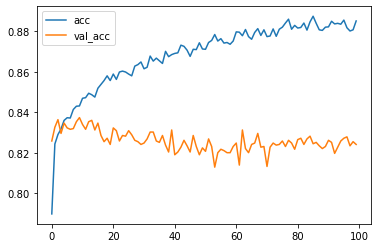

In [55]:
plt.plot(pd.DataFrame(history_1.history['accuracy']), label='acc')
plt.plot(pd.DataFrame(history_1.history['val_accuracy']), label='val_acc')

plt.legend()
plt.show()

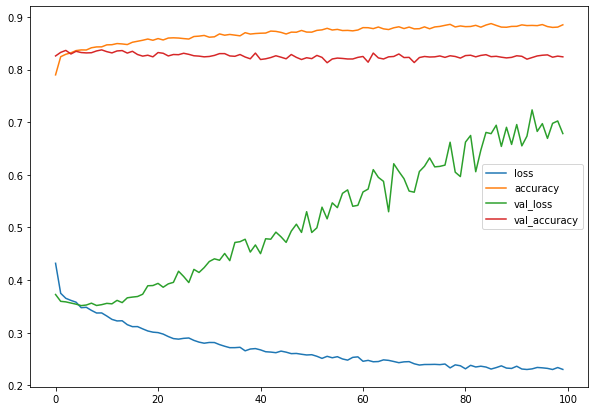

In [56]:
pd.DataFrame(history_1.history).plot(figsize=(10, 7));